In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

In [3]:
df = pd.read_csv(r"C:\Users\vatch\Downloads\archive (48)\spam.csv", encoding='latin-1')
df = df[['v1', 'v2']]  # 'v1' is label, 'v2' is text
df.columns = ['label', 'message']

In [4]:
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df['label'] = df['label'].map({'ham': 0, 'spam': 1})

In [7]:
texts = df['message'].astype(str).values
labels = df['label'].values

vocab_size = 5000
max_len = 100

tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=max_len, padding='post')
y = np.array(labels)

In [8]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train, X_test, y_train, y_test)

[[  39   31    9 ...    0    0    0]
 [ 815   16 4187 ...    0    0    0]
 [ 110   82 1262 ...    0    0    0]
 ...
 [1776   31 2512 ...    0    0    0]
 [ 734 1496 1102 ...    0    0    0]
 [   9  143   22 ...    0    0    0]] [[1261 1097 1185 ...    0    0    0]
 [   2  195   12 ...    0    0    0]
 [  40   55  223 ...    0    0    0]
 ...
 [ 138    2   18 ...    0    0    0]
 [  32    6 1276 ...    0    0    0]
 [   1    1    4 ...    0    0    0]] [nan nan nan ... nan nan nan] [nan nan nan ... nan nan nan]


In [9]:
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_len),
    Bidirectional(LSTM(32)),
    Dense(1, activation='sigmoid')
])

D:\folder desktop\ttttt\env\lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)              │ (None, 100, 64)             │         320,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_2 (Bidirectional)      │ (None, 64)                  │          24,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 344,897 (1.32 MB)

 Trainable params: 344,897 (1.32 MB)

 Non-trainable params: 0 (0.00 B)


🔹 Training Bidirectional LSTM model...
Epoch 1/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 8s 37ms/step - accuracy: 0.9993 - loss: 0.0037 - val_accuracy: 0.9854 - val_loss: 0.0784
Epoch 2/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 1.0000 - loss: 2.3541e-04 - val_accuracy: 0.9854 - val_loss: 0.0709
Epoch 3/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 1.0000 - loss: 2.4438e-04 - val_accuracy: 0.9854 - val_loss: 0.0825
Epoch 4/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 1.0000 - loss: 1.0900e-04 - val_accuracy: 0.9854 - val_loss: 0.0839
Epoch 5/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 1.0000 - loss: 9.0323e-05 - val_accuracy: 0.9854 - val_loss: 0.0841
Epoch 6/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 1.0000 - loss: 8.3398e-05 - val_accuracy: 0.9843 - val_loss: 0.0861
Epoch 7/10
112/112 ━━━━━━━━━━━━━━━━━━━━ 4s 32ms/step - accuracy: 1.0000 - loss: 6.5869e-05 - val_accuracy: 0.9843 - val_loss: 0.0876
Epoch 8/10
112/112 ━━━━━━━━━━━━━━

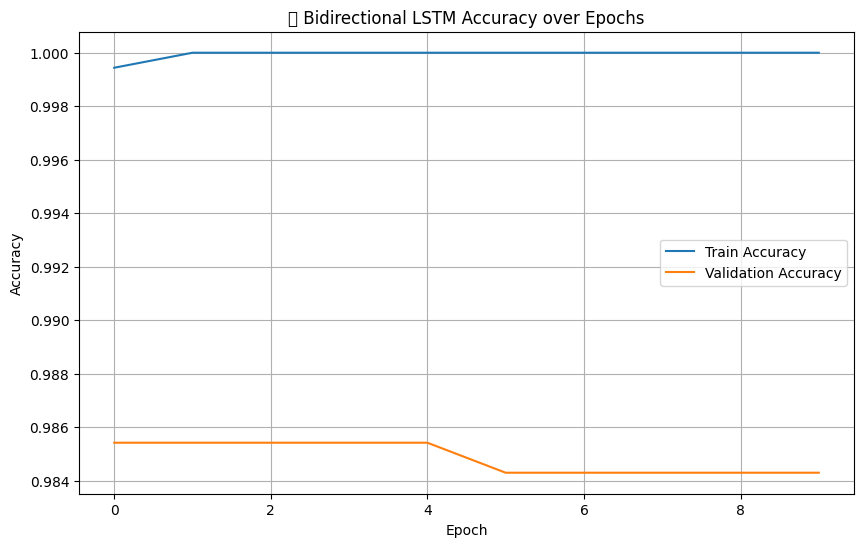

In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()
print("\n🔹 Training Bidirectional LSTM model...")
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"\n✅ Test Accuracy: {accuracy:.4f}")

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('🔹 Bidirectional LSTM Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()
